In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
import seaborn as sns
from scipy import stats
import warnings


In [287]:
# drive.mount('/content/drive')

In [288]:
warnings.filterwarnings("ignore")

In [289]:
# df1=pd.read_csv('/content/drive/MyDrive/ENB2012.csv')
df1=pd.read_csv('https://raw.githubusercontent.com/thevirengarg/Energy-Efficiency-Regression-Analysis-Project/main/ENB2012.csv')

In [290]:
df1.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [291]:
df1.tail(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [292]:
df1.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [293]:
df1.rename(columns={'X1':'Relative Compactness','X2':'Surface Area','X3':'Wall Area','X4':'Roof Area','X5':'Overall Height','X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area Distribution','Y1':'Heating Load','Y2':'Cooling Load'},inplace=True)

In [294]:
(df1==0).any()

Relative Compactness         False
Surface Area                 False
Wall Area                    False
Roof Area                    False
Overall Height               False
Orientation                  False
Glazing Area                  True
Glazing Area Distribution     True
Heating Load                 False
Cooling Load                 False
dtype: bool

In [295]:
# Building with glazing area distribution equal to 0 are warehouses (with no windows)
df1['Glazing Area Distribution'].min()

0

In [296]:
(df1['Glazing Area']==0).sum().sum()

48

In [297]:
(df1['Glazing Area Distribution']==0).sum()

48

In [298]:
(df1<0).any()

Relative Compactness         False
Surface Area                 False
Wall Area                    False
Roof Area                    False
Overall Height               False
Orientation                  False
Glazing Area                 False
Glazing Area Distribution    False
Heating Load                 False
Cooling Load                 False
dtype: bool

In [299]:
df1.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


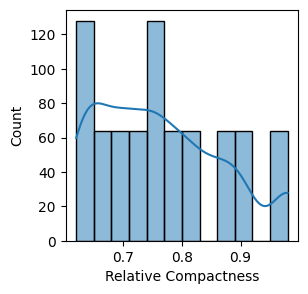

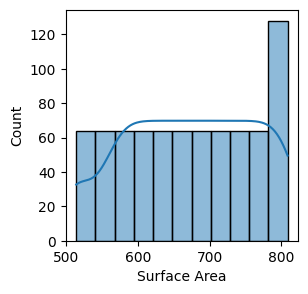

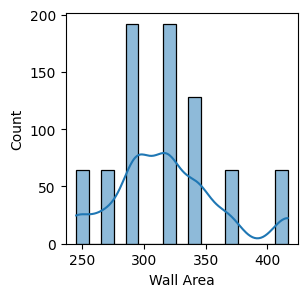

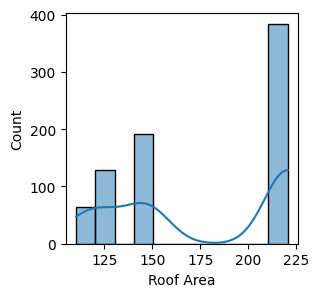

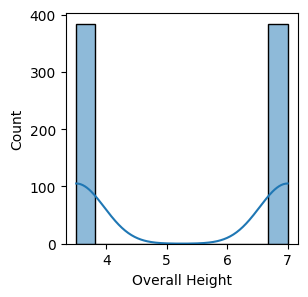

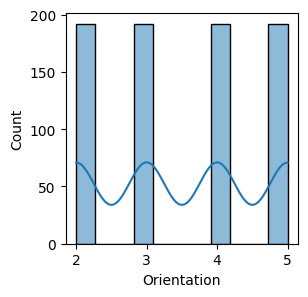

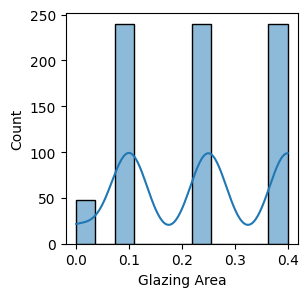

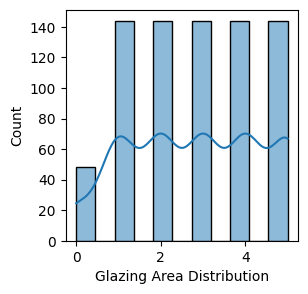

In [300]:
from scipy.stats import skew
for i in ('Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution'):
  plt.subplots(figsize=(3,3))
  sns.histplot(data=df1,x=i, kde=True)

# Relative Compactness and Surface Area has variation and lean towards numerical data.
# Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing area distribution lean towards being categorical data.

In [301]:
from scipy.stats import skew
print("Skewness of all the features are as follows: ")
for i in ('Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution'):
  column_skewness = skew(df1[i])
  print("   ",i,':',column_skewness)

Skewness of all the features are as follows: 
    Relative Compactness : 0.4945441823526014
    Surface Area : -0.12488635574227028
    Wall Area : 0.5323750928990681
    Roof Area : -0.16244592674971672
    Overall Height : 0.0
    Orientation : 0.0
    Glazing Area : -0.060136480707452804
    Glazing Area Distribution : -0.08851586032816593


In [302]:
# 'Relative compactness' and 'Wall Area' are more skewed than other parameters

In [303]:
# we are using sqrt transformation instead of log transformation to keep all the values of relative compactness positive.
df1['Relative Compactness'] = np.sqrt(df1['Relative Compactness'])
skew(df1['Relative Compactness'])

0.39046989341862925

<Axes: xlabel='Relative Compactness', ylabel='Count'>

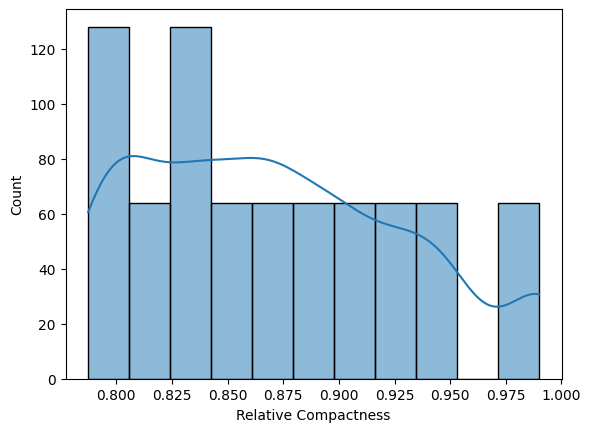

In [304]:
sns.histplot(data=df1, x='Relative Compactness', kde=True)

In [305]:
# We will add a small constant (e.g.,1) to handle zero or negative values but 'Wall Area' do not require us to do that because there is no negative or zero value.
# Performing log transformation to handle the skewness
df1['Wall Area']=np.log(df1['Wall Area'])
skew(df1['Wall Area'])

0.163024969656773

In [306]:
df1.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.872121,671.708333,5.754459,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.059808,88.086116,0.134990,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.787401,514.500000,5.501258,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.826098,606.375000,5.683580,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.866006,673.750000,5.763622,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.910994,741.125000,5.837730,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.989949,808.500000,6.031886,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [307]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<Axes: xlabel='Wall Area', ylabel='Count'>

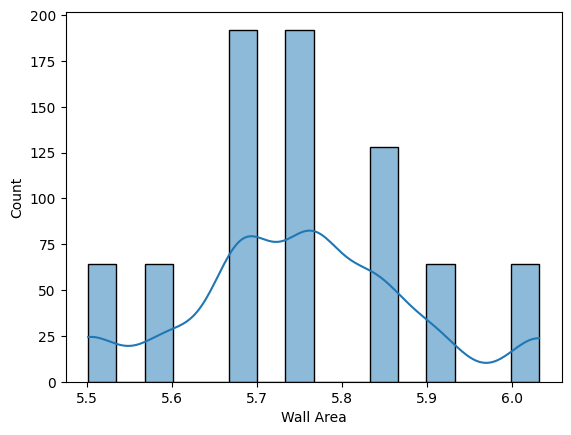

In [308]:
sns.histplot(data=df1,x='Wall Area',kde=True)

In [309]:
def find_skewed_boundaries(df, variable, distance):

    # The parameter "distance" gives us the option to estimate 1.5 times or 3 times the IQR when defining the boundaries.
    # The more we increase the "distance", the boundaries will be more wider. Hence, flagging more datapoints as outliers.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [310]:
upper_boundary, lower_boundary = find_skewed_boundaries(df1, 'Relative Compactness', 1.5)
upper_boundary, lower_boundary

(1.0383392446171151, 0.6987528529653382)

In [311]:
# Inspect the number and percentage of outliers in Relative compactness.

print('total number of Data Entries: {}'.format(len(df1)))

print('Relative compactness Entries with right end outliers: {}'.format(
    len(df1[df1['Relative Compactness'] > upper_boundary])))

print('Relative compactness Entries with left end outliers: {}'.format(
    len(df1[df1['Relative Compactness'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df1[df1['Relative Compactness'] > upper_boundary]) / len(df1)))

print('% left end outliers: {}'.format(
    len(df1[df1['Relative Compactness'] < lower_boundary]) / len(df1)))

total number of Data Entries: 768
Relative compactness Entries with right end outliers: 0
Relative compactness Entries with left end outliers: 0

% right end outliers: 0.0
% left end outliers: 0.0


<Axes: >

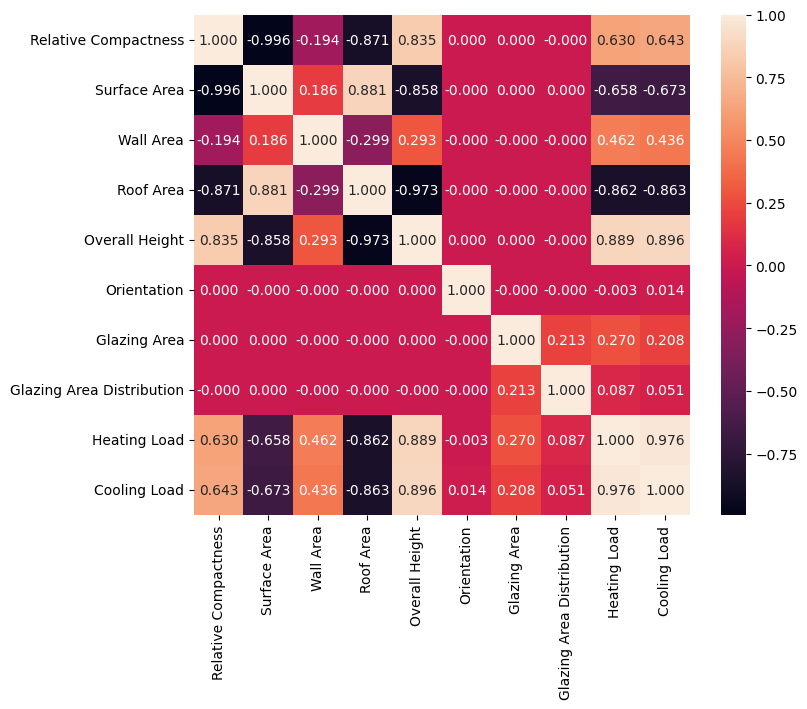

In [312]:
corr_df1=df1.corr()
plt.subplots(figsize=(8,6.5))
sns.heatmap(corr_df1, annot=True, fmt='.3f')

#Overall Height and relative compactness is highly correlated with each other and Outcomes(heating and cooling load)

In [313]:
df1.shape

(768, 10)

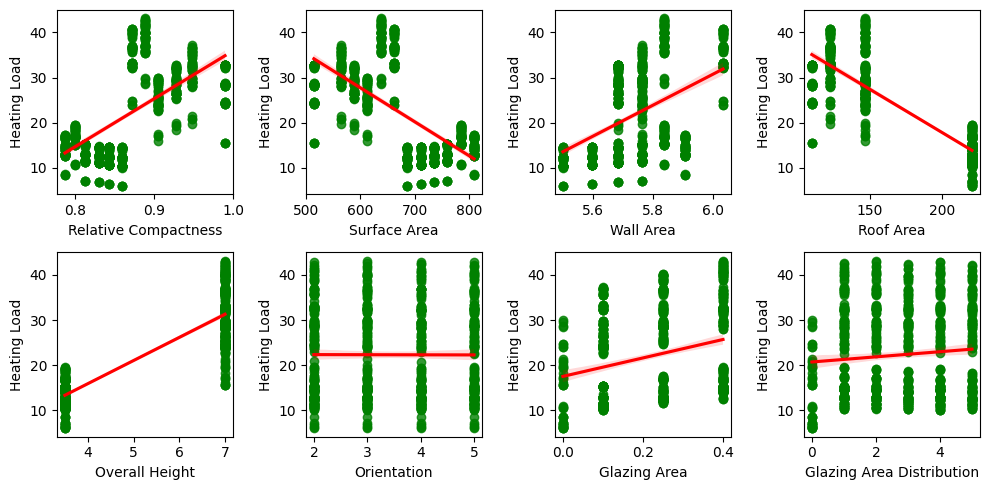

In [314]:
n_rows=2
n_cols=4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df1.iloc[:,:-2].columns):
    sns.regplot(x=df1[column], y=df1['Heating Load'], ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

In [315]:
# Most of the features are not linearly seprable with respect to Heating Load

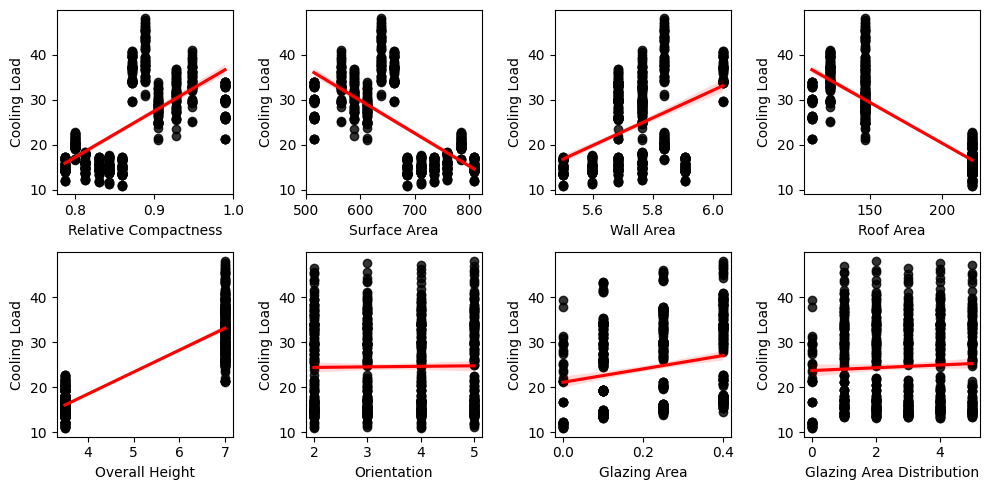

In [316]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df1.iloc[:,:-2].columns):
    sns.regplot(x = df1[column], y = df1['Cooling Load'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()

In [317]:
# Same as of Heating Load relation, relationship betweeen Cooling Load and the features are not seprable linearly.

In [318]:
# Orientation and Glazing Area is correlated to the outcomes and other features very weakly, so we can remove these columns from out dataset.

df1=df1.drop('Orientation', axis =1)
# df1=df1.drop('Overall Height', axis=1)
df1=df1.drop('Glazing Area Distribution', axis =1)

In [319]:
(df1<0).any()

Relative Compactness    False
Surface Area            False
Wall Area               False
Roof Area               False
Overall Height          False
Glazing Area            False
Heating Load            False
Cooling Load            False
dtype: bool

In [320]:
heatOutcome=df1['Heating Load']
df1=df1.drop('Heating Load', axis=1)

In [321]:
coolOutcome=df1['Cooling Load']
df1=df1.drop('Cooling Load', axis=1)

In [322]:
df1.shape

(768, 6)

In [323]:
# To make the data follow gaussian distribution, mean will be 0 and standardDeviation will be 1, it will help many algorithms to converge faster.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)
ScaledX=pd.DataFrame(X_scaled)
ScaledX.head(5)

,0,1,2,3,4,5
0,1.971395,-1.785875,-0.525411,-1.470077,1.0,-1.760447
1,1.971395,-1.785875,-0.525411,-1.470077,1.0,-1.760447
2,1.971395,-1.785875,-0.525411,-1.470077,1.0,-1.760447
3,1.971395,-1.785875,-0.525411,-1.470077,1.0,-1.760447
4,1.280971,-1.229239,0.067929,-1.198678,1.0,-1.760447


In [324]:
ScaledX.describe()

,0,1,2,3,4,5
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,7.680000e+02
mean,-2.220446e-15,-4.163336e-16,-1.628327e-15,2.174187e-16,0.000000,1.480297e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652,1.000652e+00
min,-1.417447e+00,-1.785875e+00,-1.876923e+00,-1.470077e+00,-1.000000,-1.760447e+00
25%,-7.700078e-01,-7.421818e-01,-5.254107e-01,-7.915797e-01,-1.000000,-1.009323e+00
50%,-1.023003e-01,2.319318e-02,6.792942e-02,1.583159e-01,0.000000,1.173631e-01
75%,6.503970e-01,7.885681e-01,6.172765e-01,9.725122e-01,1.000000,1.244049e+00
max,1.971395e+00,1.553943e+00,2.056515e+00,9.725122e-01,1.000000,1.244049e+00


In [325]:
ScaledX.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [326]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(df1)
MinMaxX=pd.DataFrame(X_scaled)
MinMaxX.head(10)

,0,1,2,3,4,5
0,1.000000,0.000000,0.343596,0.000000,1.0,0.0
1,1.000000,0.000000,0.343596,0.000000,1.0,0.0
2,1.000000,0.000000,0.343596,0.000000,1.0,0.0
3,1.000000,0.000000,0.343596,0.000000,1.0,0.0
4,0.796265,0.166667,0.494441,0.111111,1.0,0.0
5,0.796265,0.166667,0.494441,0.111111,1.0,0.0
6,0.796265,0.166667,0.494441,0.111111,1.0,0.0
7,0.796265,0.166667,0.494441,0.111111,1.0,0.0
8,0.691000,0.250000,0.343596,0.333333,1.0,0.0
9,0.691000,0.250000,0.343596,0.333333,1.0,0.0


In [327]:
def printPredictions(y_true, y_pred):
    # Convert y_true and y_pred to 1-dimensional arrays
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()

    # Create a DataFrame with y_true and y_pred
    predictions_df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

    # Print the predictions
    print("Predictions: ")
    print(predictions_df.head(5).to_markdown(index=False))

In [328]:
def printPredictions2(y_true, y_pred):
    # Convert y_true Series to DataFrame
    y_true_df = pd.DataFrame(y_true)

    # Convert y_pred array to DataFrame
    y_pred_df = pd.DataFrame(y_pred, columns=['Heating_pred', 'Cooling_pred'])

    # Concatenate y_true and y_pred DataFrames horizontally
    predictions_df = pd.concat([y_true_df, y_pred_df], axis=1)

    # Print the predictions
    print("Predictions: ")
    print(predictions_df.head(5).to_markdown(index=False))


Splitting the dataset


In [329]:
#coolOutcome split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df1,coolOutcome,test_size=0.2, random_state=101)
X_test.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
766,0.787401,808.5,5.906723,220.5,3.5,0.40
748,0.842615,710.5,5.596568,220.5,3.5,0.40
42,0.800000,784.0,5.837730,220.5,3.5,0.00
485,0.948683,563.5,5.763622,122.5,7.0,0.25
543,0.905539,612.5,5.763622,147.0,7.0,0.40


In [330]:
#heatOutcome split
from sklearn.model_selection import train_test_split
X_train_heat, X_test_heat, y_train_heat, y_test_heat= train_test_split(ScaledX,heatOutcome,test_size=0.2, random_state=101)
X_test.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
766,0.787401,808.5,5.906723,220.5,3.5,0.40
748,0.842615,710.5,5.596568,220.5,3.5,0.40
42,0.800000,784.0,5.837730,220.5,3.5,0.00
485,0.948683,563.5,5.763622,122.5,7.0,0.25
543,0.905539,612.5,5.763622,147.0,7.0,0.40


Linear Regression (Base line)

In [331]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [332]:
#coolOutcome model
lr.fit(X_train,y_train)

LinearRegression()

In [333]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [334]:
#coolOutcome
print("Evaluation metrics for Training set")
print("r2_score: ", r2_score(lr.predict(X_train),y_train))
print("mean_absolute_error: ",mean_absolute_error(lr.predict(X_train),y_train))
print("mean_squared_error: ", mean_squared_error(lr.predict(X_train),y_train))

Evaluation metrics for Training set
r2_score:  0.8658138212203952
mean_absolute_error:  2.3515291848260893
mean_squared_error:  10.790971359341764


In [335]:
# score for coolOutcome
print("Evaluation metrics of Testing set")
print("r2_score: ",r2_score(lr.predict(X_test),y_test))
print("mean_absolute_error: ", mean_absolute_error(lr.predict(X_test),y_test))
print("mean_squared_error: ",mean_squared_error(lr.predict(X_test),y_test))

Evaluation metrics of Testing set
r2_score:  0.8968160278230966
mean_absolute_error:  2.0110221201267886
mean_squared_error:  7.590429780398145


In [336]:
printPredictions(y_test,lr.predict(X_test))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.61 |  19.7731 |
|    15.59 |  17.9764 |
|    16.75 |  13.694  |
|    32    |  32.3731 |
|    33.54 |  36.0387 |


In [337]:
lr.fit(X_train_heat, y_train_heat)

LinearRegression()

In [338]:
#heatOutcome
print("Evaluation metrics of Training set")
print("r2_score: ",r2_score(lr.predict(X_train_heat),y_train_heat))
print("mean_absolute_error: ",mean_absolute_error(lr.predict(X_train_heat),y_train_heat))
print("mean_squared_error: ",mean_squared_error(lr.predict(X_train_heat),y_train_heat))

Evaluation metrics of Training set
r2_score:  0.9016160910930662
mean_absolute_error:  2.1490447622488005
mean_squared_error:  9.178092262967851


In [339]:
# score for heatOutcome
print("Evaluation metrics of Testing set")
print("r2_score: " , r2_score(lr.predict(X_test_heat),y_test_heat))
print("mean_absolute_error: ", mean_absolute_error(lr.predict(X_test_heat),y_test_heat))
print("mena_squared_error: ",mean_squared_error(lr.predict(X_test_heat),y_test_heat))

Evaluation metrics of Testing set
r2_score:  0.9222656933490789
mean_absolute_error:  1.7747809594402675
mena_squared_error:  6.778634064006626


In [340]:
printPredictions(y_test_heat,lr.predict(X_test_heat))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.48 | 19.0505  |
|    12.43 | 15.5965  |
|    10.77 |  9.89818 |
|    32.31 | 30.4163  |
|    28.65 | 34.6275  |


Polynomial Regression

In [341]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
lr=LinearRegression()

In [342]:
# coolOutcome
poly_train=poly.fit_transform(X_train)
poly_test=poly.fit_transform(X_test)

In [343]:
X_train.shape

(614, 6)

In [344]:
poly_train.shape

(614, 28)

In [345]:
lr.fit(poly_train, y_train)

LinearRegression()

In [346]:
#coolOutcome
print("Evaluation metrics for Training set")
print("r2_score: ", r2_score(lr.predict(poly_train),y_train))
print("mean_absolute_error: ",mean_absolute_error(lr.predict(poly_train),y_train))
print("mean_squared_error: ", mean_squared_error(lr.predict(poly_train),y_train))

Evaluation metrics for Training set
r2_score:  0.9684448208476999
mean_absolute_error:  1.1527189836791856
mean_squared_error:  2.7900712320495478


In [347]:
# coolOutcome
print("Evaluation metrics of Testing set")
print("r2_score: ",r2_score(lr.predict(poly_test),y_test))
print("mean_absolute_error: ", mean_absolute_error(lr.predict(poly_test),y_test))
print("mean_squared_error: ",mean_squared_error(lr.predict(poly_test),y_test))

Evaluation metrics of Testing set
r2_score:  0.9724952241780098
mean_absolute_error:  0.965008392726954
mean_squared_error:  2.1844719284445486


In [348]:
printPredictions(y_test,lr.predict(poly_test))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.61 |  16.7432 |
|    15.59 |  16.6737 |
|    16.75 |  17.0852 |
|    32    |  34.4352 |
|    33.54 |  30.2468 |


In [349]:
#heatOutcome
poly_train_heat=poly.fit_transform(X_train_heat)
poly_test_heat=poly.fit_transform(X_test_heat)

In [350]:
lr.fit(poly_train_heat, y_train_heat)

LinearRegression()

In [351]:
print("Evaluation metrics of Training set")
print("r2_score: ",r2_score(lr.predict(poly_train_heat),y_train_heat))
print("mean_absolute_error: ",mean_absolute_error(lr.predict(poly_train_heat),y_train_heat))
print("mean_squared_error: ",mean_squared_error(lr.predict(poly_train_heat),y_train_heat))

Evaluation metrics of Training set
r2_score:  0.9917846078279805
mean_absolute_error:  0.7228000305374593
mean_squared_error:  0.831450947933632


In [352]:
#heatOutcome
print("Evaluation metrics of Testing set")
print("r2_score: " , r2_score(lr.predict(poly_test_heat),y_test_heat))
print("mean_absolute_error: ", mean_absolute_error(lr.predict(poly_test_heat),y_test_heat))
print("mean_squared_error: ",mean_squared_error(lr.predict(poly_test_heat),y_test_heat))

Evaluation metrics of Testing set
r2_score:  0.9925887756399274
mean_absolute_error:  0.6870013189935064
mean_squared_error:  0.6793732500745103


In [353]:
printPredictions(y_test_heat,lr.predict(poly_test_heat))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.48 |  16.4414 |
|    12.43 |  13.9883 |
|    10.77 |  11.6426 |
|    32.31 |  32.7949 |
|    28.65 |  28.8672 |


Decision tree

In [354]:
from sklearn.tree import DecisionTreeRegressor
# not using polynomial features with decision tree because 1) decision tree has ability to capture non-linear features, 2) expanding number of features can lead to overfitting.

In [355]:
from sklearn.model_selection import GridSearchCV
# Define Decision Tree model
dt = DecisionTreeRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 6, 7],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[101]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 101}


In [356]:
#coolOutcome
print("Evaluation metrics for Training set")
print("r2_score: ", r2_score(grid_search.predict(X_train),y_train))
print("mean_absolute_error: ",mean_absolute_error(grid_search.predict(X_train),y_train))
print("mean_squared_error: ", mean_squared_error(grid_search.predict(X_train),y_train))

Evaluation metrics for Training set
r2_score:  0.9701125232444874
mean_absolute_error:  1.0637797486910292
mean_squared_error:  2.6468941797888497


In [357]:
#coolOutcome
print("Evaluation metrics of Testing set")
print("r2_score: ",r2_score(grid_search.predict(X_test),y_test))
print("mean_absolute_error: ", mean_absolute_error(grid_search.predict(X_test),y_test))
print("mean_squared_error: ",mean_squared_error(grid_search.predict(X_test),y_test))

Evaluation metrics of Testing set
r2_score:  0.9726362028251077
mean_absolute_error:  0.9221546627913833
mean_squared_error:  2.1836041506231396


In [358]:
printPredictions(y_test, grid_search.predict(X_test))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.61 |  16.9369 |
|    15.59 |  16.664  |
|    16.75 |  16.75   |
|    32    |  34.4825 |
|    33.54 |  30.4506 |


In [359]:
#heatOutcome
dt = DecisionTreeRegressor()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [6, 7, 8], #max depth of each tree
    'min_samples_split': [3, 4], #min samples required to make a node split
    'min_samples_leaf': [1, 2], #min samples required to consider a node leaf
    'max_features': ['auto', 'sqrt', 'log2'], #considering number of features at each split
    'random_state':[101]
    
}

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_heat, y_train_heat)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 101}


In [360]:
print("Evaluation metrics of Training set")
print("r2_score: ",r2_score(grid_search.predict(X_train_heat),y_train_heat))
print("mean_absolute_error: ",mean_absolute_error(grid_search.predict(X_train_heat),y_train_heat))
print("mean_squared_error: ",mean_squared_error(grid_search.predict(X_train_heat),y_train_heat))

Evaluation metrics of Training set
r2_score:  0.9978788574778066
mean_absolute_error:  0.3375708298377354
mean_squared_error:  0.21688630648736001


In [361]:
print("Evaluation metrics of Testing set")
print("r2_score: ",r2_score(grid_search.predict(X_test_heat),y_test_heat))
print("mean_absolute_error: ", mean_absolute_error(grid_search.predict(X_test_heat),y_test_heat))
print("mean_squared_error: ",mean_squared_error(grid_search.predict(X_test_heat),y_test_heat))


Evaluation metrics of Testing set
r2_score:  0.9982468785121635
mean_absolute_error:  0.28361730575557403
mean_squared_error:  0.16546639666593496


In [362]:
printPredictions(y_test_heat, grid_search.predict(X_test_heat))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.48 |  16.7115 |
|    12.43 |  14.0927 |
|    10.77 |  10.65   |
|    32.31 |  32.4375 |
|    28.65 |  29.1744 |


Random Forest

In [363]:
from sklearn.ensemble import RandomForestRegressor

In [364]:
param_grid = {
    'n_estimators': [150, 175, 200], #number of trees in forest
    'max_depth': [8, 9],  #max depth of each tree
    'min_samples_split': [3, 4], #min number of samples required to split the node
    'min_samples_leaf': [1, 2], #min number of samples required to consider a node leaf or not
    'max_features': ['auto', 'log2', 'sqrt'],
}

rf_regressor = RandomForestRegressor(random_state=101)

grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# training the model
grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_params = grid_search.best_params_

# Train the best Random Forest Regressor model on the full training data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [365]:
#coolOutcome
print("Evaluation metrics for Training set")
print("r2_score: ", r2_score(grid_search.predict(X_train),y_train))
print("mean_absolute_error: ",mean_absolute_error(grid_search.predict(X_train),y_train))
print("mean_squared_error: ", mean_squared_error(grid_search.predict(X_train),y_train))

Evaluation metrics for Training set
r2_score:  0.9702453343522084
mean_absolute_error:  1.056292067030183
mean_squared_error:  2.6321599997481817


In [366]:
#coolOutcome
print("Evaluation metrics of Testing set")
print("r2_score: ",r2_score(grid_search.predict(X_test),y_test))
print("mean_absolute_error: ", mean_absolute_error(grid_search.predict(X_test),y_test))
print("mean_squared_error: ",mean_squared_error(grid_search.predict(X_test),y_test))

Evaluation metrics of Testing set
r2_score:  0.973316414185172
mean_absolute_error:  0.8926857106335361
mean_squared_error:  2.133734024776453


In [367]:
printPredictions(y_test, grid_search.predict(X_test))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.61 |  16.945  |
|    15.59 |  16.6482 |
|    16.75 |  16.8738 |
|    32    |  34.5117 |
|    33.54 |  30.5057 |


In [368]:
param_grid = {
    'n_estimators': [125, 175, 200],
    'max_depth': [8, 9],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'log2', 'sqrt'],
}

rf_regressor = RandomForestRegressor(random_state=101)

grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_heat, y_train_heat)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [369]:
print("Evaluation metrics of Training set")
print("r2_score: ",r2_score(grid_search.predict(X_train_heat),y_train_heat))
print("mean_absolute_error: ",mean_absolute_error(grid_search.predict(X_train_heat),y_train_heat))
print("mean_squared_error: ",mean_squared_error(grid_search.predict(X_train_heat),y_train_heat))

Evaluation metrics of Training set
r2_score:  0.9978438741474206
mean_absolute_error:  0.34377387598385084
mean_squared_error:  0.21990349204832244


In [370]:
#heatOutcome
print("Evaluation metrics of Testing set")
print("r2_score: ",r2_score(grid_search.predict(X_test_heat),y_test_heat))
print("mean_absolute_error: ", mean_absolute_error(grid_search.predict(X_test_heat),y_test_heat))
print("mean_squared_error: ",mean_squared_error(grid_search.predict(X_test_heat),y_test_heat))

Evaluation metrics of Testing set
r2_score:  0.9981848041862403
mean_absolute_error:  0.29425281945838294
mean_squared_error:  0.1705246155680923


In [371]:
printPredictions(y_test_heat, grid_search.predict(X_test_heat))

Predictions: 
|   y_true |   y_pred |
|---------:|---------:|
|    16.48 |  16.6988 |
|    12.43 |  14.077  |
|    10.77 |  10.9267 |
|    32.31 |  32.4199 |
|    28.65 |  29.1508 |
